# Session 1:Data Import and Cleaning Tasks

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Assessing the Data

In [2]:

try:
    with open('NSMES1988 - NSMES1988.csv', 'r') as nsmeFile:
        nsme_df = pd.read_csv(nsmeFile)
except Exception as e:
    print(f'Unexpected error: {e}')

nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


In [3]:
nsme_df.info(memory_usage='deep')

print(nsme_df.memory_usage(deep=True))

nsme_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  gender      4406 non-null   object 
 13  married     4406 non-null   object 
 14  school      4406 non-null   int64  
 15  income      4406 non-null   float64
 16  employed    4406 non-null   object 
 17  insurance   4406 non-null   object 
 18  medicaid    4406 non-null   object 
dtypes: float64(2), int64(9), ob

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [4]:
print(nsme_df['health'].unique())
print(nsme_df['adl'].unique())
print(nsme_df['region'].unique())
print(nsme_df['gender'].unique())
print(nsme_df['married'].unique())
print(nsme_df['employed'].unique())
print(nsme_df['insurance'].unique())
print(nsme_df['medicaid'].unique())

['average' 'poor' 'excellent']
['normal' 'limited']
['other' 'midwest' 'northeast' 'west']
['male' 'female']
['yes' 'no']
['yes' 'no']
['yes' 'no']
['no' 'yes']


## Initial thoughts

1. the first column looks like a mistake where it is pulling the index of the dataframe and inserted as an unnecessary column, they wanted to create a 1 index list
2. the first columns visits to novisits dont really make sense when you see the description of the columns. Need better clarification and naming.
3. why is the age column in the form of floats? were the numbers divided by 10? 
4. school needs to be named something different, looks like a hashed lookup
5. why is income in the form of a single digit float with precision of 6? was this meant to be the opposite? 6 numbers ahead of decimal? divided by 10k? also one of the min values is negative?

In [5]:
try:
    nsme_json = nsme_df.to_json('NSMES1988.json', orient='records', indent=4)
except Exception as e:
    print(f'Unexpected error occured: {e}')


In [6]:
nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


## Recommmendations

1. We need to remove the unnamed column and properly 1-index the data
2. Unnormalize age and income (multiply age by 10 and income by 10000)
3. One or more of the incomes is negative, this was not supposed to include expenses (if intentional) square all incomes and sqrt before adding back to unnormalize
4. We can turn all dtype int values that represent mostly visits into dtype uint16. To be unsigned and also non-negative integers that max out at 
65,535 which even if you visit every day that would take 179.5 years to reach max. This saves us from 8 bytes to 2bytes in memory. 
5. The object dtype from string as a default dtype that only requires 2 unique answers can be represented as a boolean and presented as its respective string pair when needed. objects take up significantly more memory, booleans take up 1byte. We can even use pd.NA for 'nulls'
6. Age can be represented also as a dtype uint16
7. Income can be downcasted to a float32, where the max is 3.402*10^38. More than enough for an income and still can represent the decimals if need be. I would mostly consider assigning dtype uint32 max of 2.1 billion for this as it is mostly irrelevant for decimal places in incomes. 

## Export data as new file

In [7]:
try:
    nsme_df.to_csv('NSMES1988new.csv', index=False)
except Exception as e:
    print(f'Unexpected error occured: {e}')
nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


# Session 2: Data Processing and Statistical Analysis

## Import copy of Data

In [8]:
nsme_df__sess2_copy = pd.read_csv('NSMES1988new.csv')

nsme_df__sess2_copy.info(memory_usage='deep')
print(nsme_df__sess2_copy.describe())
nsme_df__sess2_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  gender      4406 non-null   object 
 13  married     4406 non-null   object 
 14  school      4406 non-null   int64  
 15  income      4406 non-null   float64
 16  employed    4406 non-null   object 
 17  insurance   4406 non-null   object 
 18  medicaid    4406 non-null   object 
dtypes: float64(2), int64(9), ob

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


## Applying Recommendations

### Manipulate the data

In [ ]:
#Drop the unnamed columns that were indexes mistakenly put into the data. Create a variable to play around with
nsme_df__sess2_copy.drop(['Unnamed: 0'], axis=1, inplace=True)

#Just for user visualization adjusted index to be 1 indexed
nsme_df__sess2_copy.index += 1

 #Multiply and assign the age by 10 to unnormalize the data. Understand it's still a float!
nsme_df__sess2_copy['age'] *= 10

#Multiply and assign income by 10000 to unnormalize the data. There was a negative so abs it first
nsme_df__sess2_copy['income'] = abs(nsme_df__sess2_copy['income'])
nsme_df__sess2_copy['income'] *= 10000

nsme_df__sess2_copy

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.00,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.00,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6532.00,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.00,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.00,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,normal,other,84.0,female,yes,8,22497.00,no,yes,no
4403,12,0,0,0,0,0,average,2,normal,other,78.0,female,no,11,58132.00,no,yes,no
4404,10,0,20,0,1,1,average,5,normal,other,73.0,male,yes,12,38779.16,no,yes,no
4405,16,1,0,0,0,0,average,0,normal,other,66.0,female,yes,12,38779.16,no,yes,no


### Default Int to uint16 conversions

In [10]:
#Gather and convert all int dtypes into uint16 as per recommended to see the memory size difference
nsme_df__sess2_copy = nsme_df__sess2_copy.astype({
    'visits': np.uint16, 
    'nvisits': np.uint16,
    'ovisits': np.uint16,
    'novisits': np.uint16,
    'emergency': np.uint16,
    'hospital': np.uint16,
    'chronic': np.uint16,
    'school': np.uint16,
    'age': np.uint16
})

print(nsme_df__sess2_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   uint16 
 1   nvisits    4406 non-null   uint16 
 2   ovisits    4406 non-null   uint16 
 3   novisits   4406 non-null   uint16 
 4   emergency  4406 non-null   uint16 
 5   hospital   4406 non-null   uint16 
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   uint16 
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   uint16 
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   uint16 
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(1), object(8), uint16(9)
memory usage: 1.9 MB
None


### Default string object to bool conversions

In [11]:
#Gather and convert all string types with only 2 string variations into bools and convert them later for printing
# Can't convert like we would the others, they have to be mapped, or else astype bool always returns true for non empty string 

nsme_df__sess2_copy['adl'] = nsme_df__sess2_copy['adl'].map({'limited': True, 'normal': False})
nsme_df__sess2_copy['gender'] = nsme_df__sess2_copy['gender'].map({'male': True, 'female': False})    #note it is male based, so True = male
nsme_df__sess2_copy['married'] = nsme_df__sess2_copy['married'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['employed'] = nsme_df__sess2_copy['employed'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['insurance'] = nsme_df__sess2_copy['insurance'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['medicaid'] = nsme_df__sess2_copy['medicaid'].map({'yes': True, 'no': False})


# Print string outcomes from object columns for reference
print(nsme_df['health'].unique())
print(nsme_df['adl'].unique())
print(nsme_df['region'].unique())
print(nsme_df['gender'].unique())
print(nsme_df['married'].unique())
print(nsme_df['employed'].unique())
print(nsme_df['insurance'].unique())
print(nsme_df['medicaid'].unique())
print(nsme_df__sess2_copy.info(memory_usage='deep'))

['average' 'poor' 'excellent']
['normal' 'limited']
['other' 'midwest' 'northeast' 'west']
['male' 'female']
['yes' 'no']
['yes' 'no']
['yes' 'no']
['no' 'yes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   uint16 
 1   nvisits    4406 non-null   uint16 
 2   ovisits    4406 non-null   uint16 
 3   novisits   4406 non-null   uint16 
 4   emergency  4406 non-null   uint16 
 5   hospital   4406 non-null   uint16 
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   uint16 
 8   adl        4406 non-null   bool   
 9   region     4406 non-null   object 
 10  age        4406 non-null   uint16 
 11  gender     4406 non-null   bool   
 12  married    4406 non-null   bool   
 13  school     4406 non-null   uint16 
 14  income     4406 non-null   float64
 15  employed   4406 non-null   bool   
 16  insuran

### Income column to uint32 conversion

In [12]:
# Convert Income into a uint32 as how I dont think salaries need a decimal place in MOST cases
# The max of uint32 is 4,294,967,295 or 2^32 -1 which should suffice for almost everyone
nsme_df__sess2_copy = nsme_df__sess2_copy.astype({
    'income': np.uint32
})

print(nsme_df__sess2_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visits     4406 non-null   uint16
 1   nvisits    4406 non-null   uint16
 2   ovisits    4406 non-null   uint16
 3   novisits   4406 non-null   uint16
 4   emergency  4406 non-null   uint16
 5   hospital   4406 non-null   uint16
 6   health     4406 non-null   object
 7   chronic    4406 non-null   uint16
 8   adl        4406 non-null   bool  
 9   region     4406 non-null   object
 10  age        4406 non-null   uint16
 11  gender     4406 non-null   bool  
 12  married    4406 non-null   bool  
 13  school     4406 non-null   uint16
 14  income     4406 non-null   uint32
 15  employed   4406 non-null   bool  
 16  insurance  4406 non-null   bool  
 17  medicaid   4406 non-null   bool  
dtypes: bool(6), object(2), uint16(9), uint32(1)
memory usage: 597.7 KB
None


### Column Name changes

In [13]:
# Change the names of columns it gives better clarity of what this is, just 'school' is not intuitive enough without the data page
nsme_df__sess2_copy.rename(columns = {'school': 'yearsofedu'}, inplace=True)
nsme_df__sess2_copy.rename(columns = {'adl': 'actionlimited'}, inplace=True)
nsme_df__sess2_copy.rename(columns = {'hospital': 'hospitalstays'}, inplace=True)

nsme_df__sess2_copy

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4403,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4404,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4405,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


## Assess new manipulated data

### Data numbers

In [14]:
print(nsme_df__sess2_copy.info(memory_usage='deep'))
nsme_df__sess2_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,chronic,age,yearsofedu,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25284.144122
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29235.322071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9128.750000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


In [15]:
print(nsme_df__sess2_copy.isnull().sum())      #check for nulls or empty data
nsme_df__sess2_copy.head(20)


visits           0
nvisits          0
ovisits          0
novisits         0
emergency        0
hospitalstays    0
health           0
chronic          0
actionlimited    0
region           0
age              0
gender           0
married          0
yearsofedu       0
income           0
employed         0
insurance        0
medicaid         0
dtype: int64


,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
6,17,0,0,0,0,0,poor,5,True,other,66,False,False,7,3301,False,False,True
7,9,0,0,0,0,0,average,0,False,midwest,75,False,False,8,8280,False,True,False
8,3,0,0,0,0,0,average,0,False,midwest,87,False,False,8,30456,False,True,False
9,1,0,0,0,0,0,average,0,False,midwest,73,False,False,8,30456,False,True,False
10,0,0,0,0,0,0,average,0,False,midwest,78,False,False,8,30456,False,True,False


### Data Graphs

1. First observation was the clear indication of less memory usage from 2.2 MB to 597.7 KB
2. The describe on visits is a bit weird, the mean is around 5 but the max is 85, someone is visiting a LOT more
3. Income is a bit off, but not suspicious, someone has 0 income and someone has an insanely large income

#### Assessing Visits 

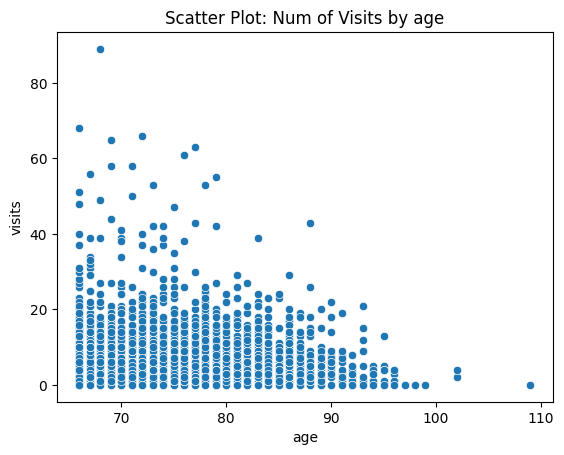

In [16]:
#Visualize visits as it looks a bit off, i'll compare it to age since that should be a good correlation
sns.scatterplot(x='age', y='visits', data=nsme_df__sess2_copy)

plt.title('Scatter Plot: Num of Visits by age')

plt.show()

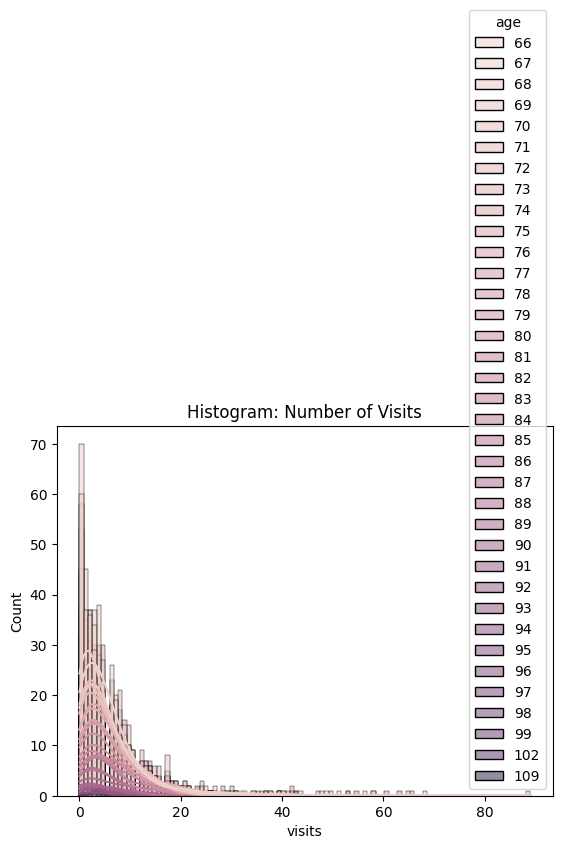

In [17]:
#Scatterplot doesnt look the best, but gave a good visual of outliers! Let's try histogram
sns.histplot(data=nsme_df__sess2_copy, x='visits', kde=True, hue='age')

plt.title('Histogram: Number of Visits')

plt.show()


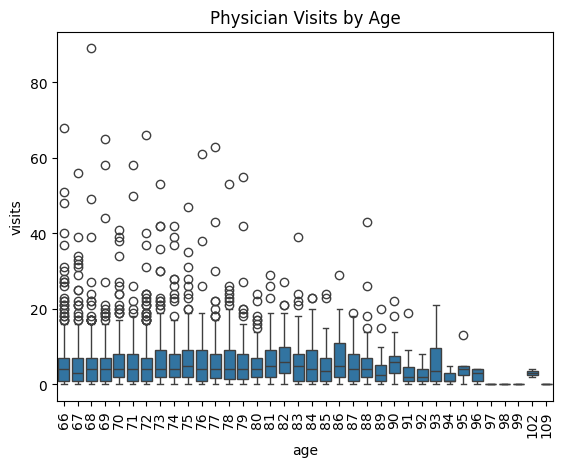

In [18]:
# Histogram enforced what we observed, we knew the visits averaged the lower side, few outliers on high end
# Box plot example could help more for average clusters
sns.boxplot(x='age', y='visits', data=nsme_df__sess2_copy)

plt.title('Physician Visits by Age')
plt.xticks(rotation=90)

plt.show()

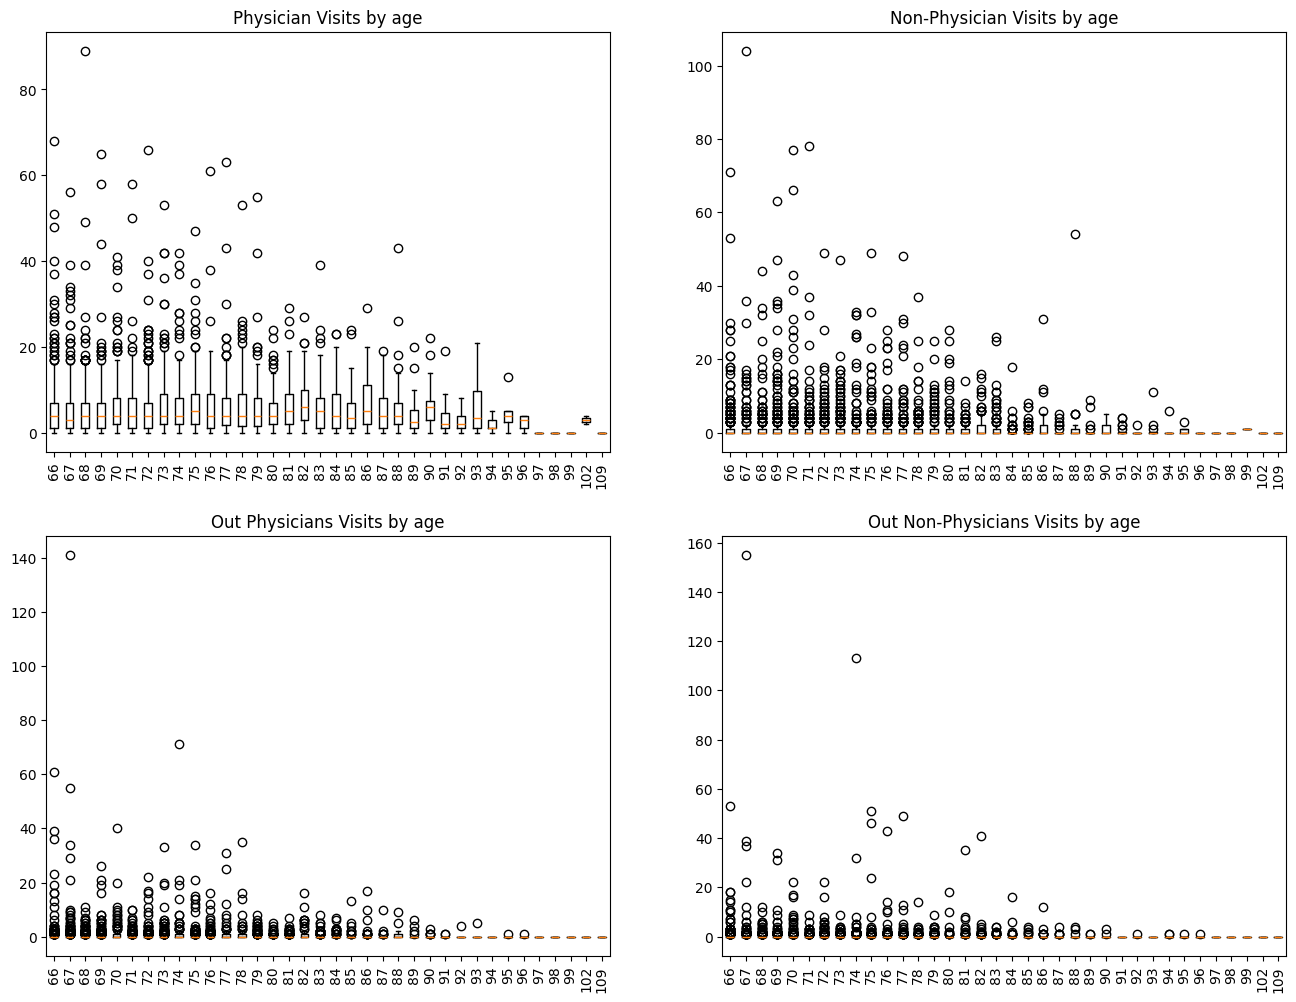

In [19]:
#I like the look of box plots the most in visits data representation vs age, lets add other visit data sets to visualize side-by-side
visits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['visits']
nvisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['nvisits']
ovisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['ovisits']
novisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['novisits']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].boxplot([v for _,v in visits_by_age], tick_labels=visits_by_age.groups.keys())
axs[0, 1].boxplot([v for _,v in nvisits_by_age], tick_labels=nvisits_by_age.groups.keys())
axs[1, 0].boxplot([v for _,v in ovisits_by_age], tick_labels=ovisits_by_age.groups.keys())
axs[1, 1].boxplot([v for _,v in novisits_by_age], tick_labels=novisits_by_age.groups.keys())

axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 1].tick_params(axis='x', rotation=90)

axs[0, 0].set_title('Physician Visits by age')
axs[0, 1].set_title('Non-Physician Visits by age')
axs[1, 0].set_title('Out Physicians Visits by age')
axs[1, 1].set_title('Out Non-Physicians Visits by age')

plt.show()

There's clearly a disparity and several outliers that are skewing the visits based on some ages (mainly 67), further information needs to be revealed on why these patients are having a large amount of visits

#### Assessing Income

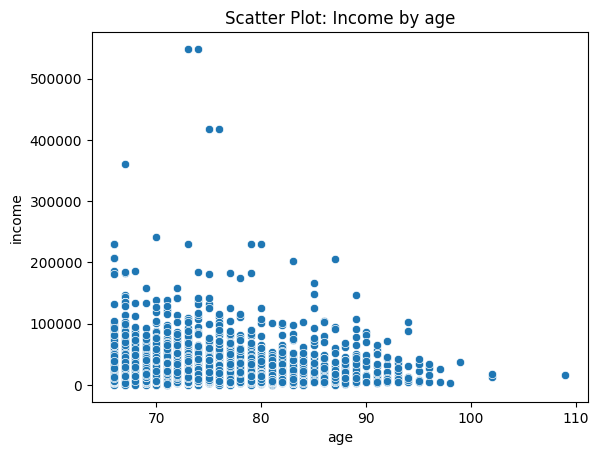

In [20]:
#Visualize income as it looks a bit off, i'll compare it to age since that should be a good correlation
sns.scatterplot(x='age', y='income', data=nsme_df__sess2_copy)

plt.title('Scatter Plot: Income by age')

plt.show()

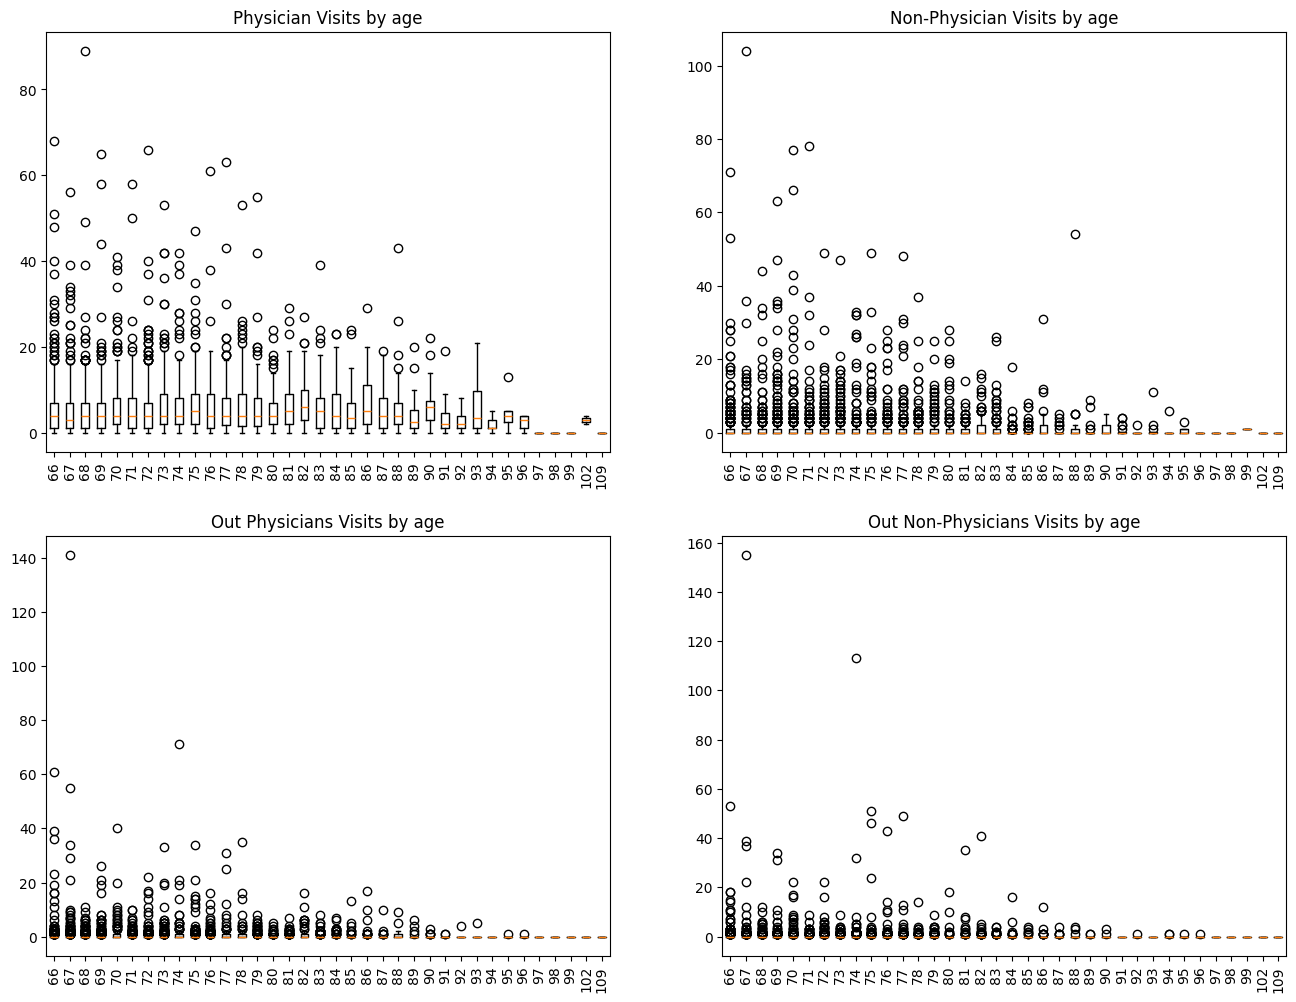

In [21]:
#I like the look of box plots the most in visits data representation vs age, lets add other visit data sets to visualize side-by-side
visits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['visits']
nvisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['nvisits']
ovisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['ovisits']
novisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['novisits']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].boxplot([v for _,v in visits_by_age], tick_labels=visits_by_age.groups.keys())
axs[0, 1].boxplot([v for _,v in nvisits_by_age], tick_labels=nvisits_by_age.groups.keys())
axs[1, 0].boxplot([v for _,v in ovisits_by_age], tick_labels=ovisits_by_age.groups.keys())
axs[1, 1].boxplot([v for _,v in novisits_by_age], tick_labels=novisits_by_age.groups.keys())

axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 1].tick_params(axis='x', rotation=90)

axs[0, 0].set_title('Physician Visits by age')
axs[0, 1].set_title('Non-Physician Visits by age')
axs[1, 0].set_title('Out Physicians Visits by age')
axs[1, 1].set_title('Out Non-Physicians Visits by age')

plt.show()

In [30]:
nsme_df__sess2_copy.to_csv('NSMES1988updated.csv', index=False)
nsme_df__sess2_copy.info(memory_usage='deep')
nsme_df__sess2_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4403,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4404,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4405,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


# Session 3: Data Analysis with Pandas

## Identifying Types of Variables

### Importing updated CSV file

In [96]:
import pandas as pd

dtypes = ({
    'visits': np.uint16, 
    'nvisits': np.uint16,
    'ovisits': np.uint16,
    'novisits': np.uint16,
    'emergency': np.uint16,
    'hospitalstays': np.uint16,
    'chronic': np.uint16,
    'yearsofedu': np.uint16,
    'age': np.uint16,
    'income': np.uint32,
    'adl': np.bool,
    'gender': np.bool,
    'married': np.bool,
    'employed': np.bool,
    'insurance': np.bool,
    'medicaid': np.bool,
})

session_3_data = pd.read_csv('NSMES1988updated.csv', dtype=dtypes)
session_3_data.info(memory_usage='deep')
print(session_3_data.describe())
session_3_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
1,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
2,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
3,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
4,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4402,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4403,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4404,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


### Identifying Types of Variables

#### Numerical 

In the data the columns below can be assumed as numerical:

Visits,
nVisits,
oVisits,
noVisits,
emergency,
hospitalstays,
chronic,
age,
yearsofedu,
Income,

All these columns are numbers that can be used in math for instance, it can be measured and quantified for whatever the reason may be.

#### Categorical

In the data the columns below can be assumed as categorical:

health,
actionlimited,
region,
gender,
married,
employed,
insurance,
medicaid,

All these columns are labels, groups, or just regular categories, that can be used to identify the data as something.

#### Continuous

In the data the columns below can be assumed as continuous:

income

All these columns represent an infinite range of numbers even if it starts at 0 it can be decimals and have infinite value in it's range.

#### Discrete

In the data the columns below can be assumed as discrete:

Visits,
nVisits,
oVisits,
noVisits,
emergency,
hospitalstays,
chronic,
age,
yearsofedu,

All these columns are specific value counts, they can't be split by values in between, either counted or not.

#### Nominal

In the data the columns below can be assumed as nominal:

actionlimited,
region,
gender,
married,
employed,
insurance,
medicaid,

All these columns have no order or ranking, they just exist as an unordered label that can change at any time regardless of the previous outcome.

#### Ordinal

In the data the columns below can be assumed as ordinal:

health

All these columns have an order or ranking, they tell you how meaningful something is based on the previous outcome i.e. poor to excellent indicates better health.

#### Data type Conclusion

1. My first mistake was handling writing to CSV's they cannot keep my manipulated Dtypes from previous manipulations so i have to suggest what they are every time. I can do this in the form of another file using to_parquet() and read_parquet(), or infer it directly in the notebook. 
2. Continuous and Discrete are types of numerical data 
3. Nominal and Ordinal are types of categorical data
4. This helps us to understand how this data should look when either observing or manipulating it and helps out expected outcomes when using it.

## Analyzing Data

### Imports

In [75]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

### Statistical Analysis Graphs

#### Discrete Numerical

In [5]:
print(session_3_data['visits'].describe())
print(session_3_data['nvisits'].describe())
print(session_3_data['ovisits'].describe())
print(session_3_data['novisits'].describe())
print(session_3_data['yearsofedu'].describe())

if False:
    sns.histplot(session_3_data['visits'])
    print(f'Visits Mode: {session_3_data['visits'].mode()}')
    plt.title('physician Visits')
    plt.show()
    sns.histplot(session_3_data['nvisits'])
    plt.title('non-physician Visits')
    plt.show()
    sns.histplot(session_3_data['ovisits'])
    plt.title('outpatient Visits')
    plt.show()
    sns.histplot(session_3_data['novisits'])
    plt.title('non-physician outpatient Visits')
    plt.show()
    sns.histplot(session_3_data['yearsofedu'])
    plt.title('years of education')
    plt.show()

NameError: name 'session_3_data' is not defined

In these discrete numerical columns:

1. all visits columns show a shape of heavily skewed right and their counts of how many visits has a mean of 5 or less generally low counts. There are some heavy outliers on the tail. the Central Tendency would lean heavy towards being less than 5 visits or so.
2. years of education shows a normal bell curve shape with the central tendency around 10 or 11. 

#### Nominal Categorical 

In [6]:
print(session_3_data['gender'].value_counts(normalize=True))
print(session_3_data['married'].value_counts(normalize=True))
print(session_3_data['employed'].value_counts(normalize=True))
print(session_3_data['insurance'].value_counts(normalize=True))
print(session_3_data['medicaid'].value_counts(normalize=True))

if False:
    sns.countplot(x='gender', data=session_3_data)
    plt.title('False=Woman, True=Man')
    plt.suptitle('Gender', fontweight='bold')
    plt.show()
    sns.countplot(x='married', data=session_3_data)
    plt.title('married')
    plt.show()
    sns.countplot(x='employed', data=session_3_data)
    plt.title('employed')
    plt.show()
    sns.countplot(x='insurance', data=session_3_data)
    plt.title('insurance')
    plt.show()
    sns.countplot(x='medicaid', data=session_3_data)
    plt.title('medicaid')
    plt.show()

NameError: name 'session_3_data' is not defined

In these categorical data types:

1. gender shape is fairly close making it more of a normal bell curve with the central tendency skewed a bit to women
2. married shape is also fairly close with a normal bell curve with the central tendency skewed towards married
3. employed is heavily skewed towards false with the central on false aws well
4. insurance is heavily skewed true
5. medicaid is heavily skewed false 

#### Continuous Numerical 

count      4406.000000
mean      25284.144122
std       29235.322071
min           0.000000
25%        9128.750000
50%       16981.500000
75%       31728.500000
max      548351.000000
Name: income, dtype: float64
Mode: 0    4320
Name: income, dtype: uint32
Median: 16981.5


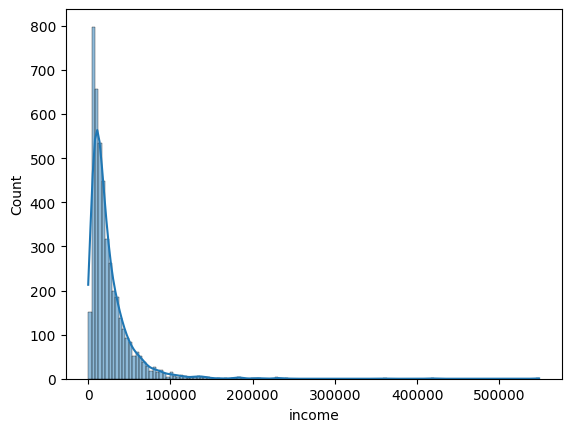

In [ ]:
print(session_3_data['income'].describe())
print(f'Mode: {session_3_data['income'].mode()}')
print(f'Median: {session_3_data['income'].median()}')

sns.histplot(session_3_data['income'], kde=True)
plt.show()

For income it's shape is a right skewed continuos numerical shape with heavy tails on the right. The central tendency with a mode of 0 and 4320 but a mean of 25284 and median of 16981 shows me that the income will normalize or center around 20k maybe a bit more towards 23k. 

#### Data Relations

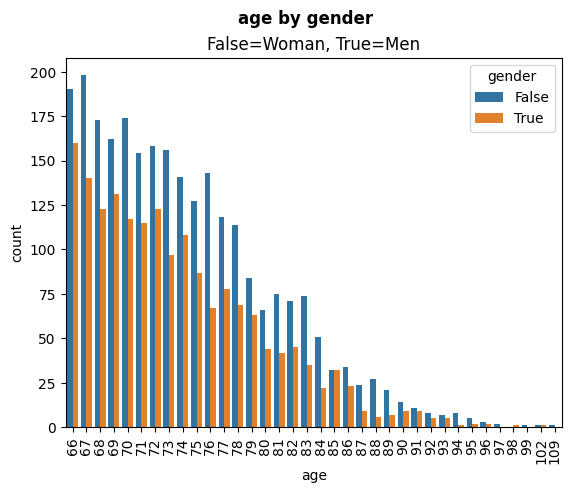

In [132]:
sns.countplot(x='age', data=session_3_data, hue='gender')
plt.title('False=Woman, True=Men')
plt.suptitle('age by gender', fontweight='bold')
plt.xticks(rotation=90)
plt.show()


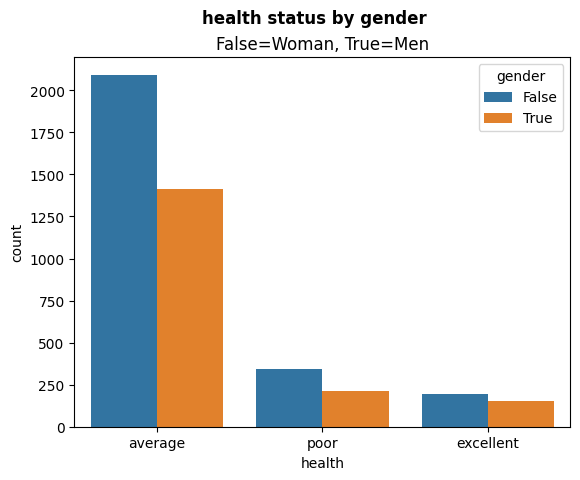

In [134]:
sns.countplot(x='health', data=session_3_data, hue='gender')
plt.suptitle('health status by gender', fontweight='bold')
plt.title('False=Woman, True=Men')
plt.show()

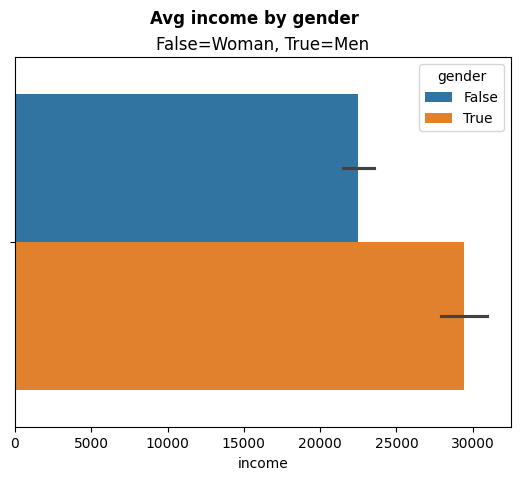

In [135]:
sns.barplot(x='income', data=session_3_data, hue='gender')
plt.suptitle('Avg income by gender', fontweight='bold')
plt.title('False=Woman, True=Men')
plt.show()

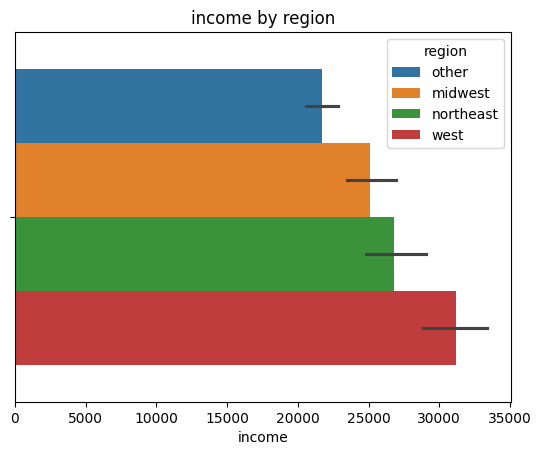

In [142]:
sns.barplot(x='income', data=session_3_data, hue='region')
plt.title('income by region')
plt.show()

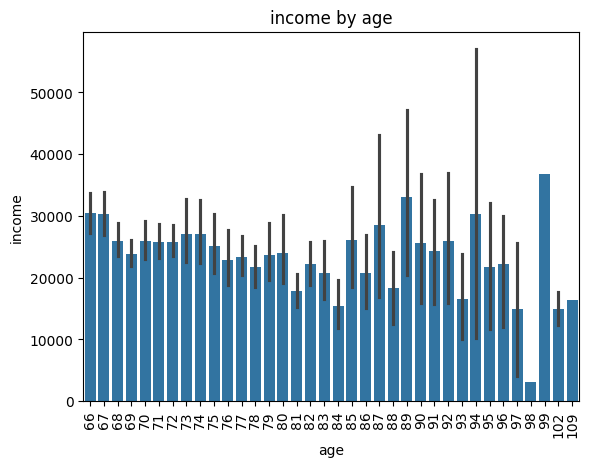

In [141]:
sns.barplot(x='age', y='income', data=session_3_data)
plt.title('income by age')
plt.xticks(rotation=90)
plt.show()

1. Age by gender looks relatively the same as what we saw in the gender percentage graph where there are plenty more women than men and this was reflective throughout all ages as it lowered as people get older. There doesnt seem to be any relation between the 2.
2. Health status looks like no relation as well, the women vs men population reflects the original, several more women are healthier than men. Poor and excellent health conditions are low compared to average.
3. Average income by gender shows a skewed income towards men in this relation. This is showing if you are a man then your income will be higher despite having the lower population. 
4. Income by region shows us the ranking of income goes west > northeast > midwest > other. This tells us, if you are in the west region youll most likely have more income than if you were in other region.
5. Income by age relation shows us people get a lot more money skewed towards old age. This helps show the older you get the higher the income.

# Session 4: Data Visualization Techniques

## Importing and Initial Analysis

In [441]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from scipy import stats
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, QuantileTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [295]:
session_4_dirty_df = pd.read_csv('NSMES1988_Dirty.csv')
session_4_dirty_df 

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5.0,0.0,0.0,0.0,0.0,1.0,average,2.0,normal,other,7.118184,male,yes,6.0,3.113430,yes,yes,no
1,1.0,0.0,2.0,0.0,2.0,0.0,average,2.0,normal,other,7.678722,female,yes,10.0,2.774612,no,yes,no
2,13.0,0.0,0.0,0.0,3.0,3.0,poor,4.0,limited,other,NaN,female,no,10.0,NaN,no,no,yes
3,16.0,0.0,5.0,0.0,1.0,1.0,poor,2.0,limited,other,7.808326,male,yes,3.0,0.901941,no,yes,no
4,3.0,0.0,0.0,0.0,NaN,0.0,average,2.0,limited,other,8.133072,female,yes,6.0,0.829845,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11.0,0.0,0.0,1.0,0.0,0.0,average,0.0,normal,other,8.710931,female,yes,8.0,2.305589,no,yes,no
4402,12.0,0.0,0.0,0.0,0.0,NaN,average,2.0,normal,other,NaN,female,no,11.0,5.819046,no,yes,no
4403,10.0,0.0,20.0,0.0,1.0,1.0,average,NaN,normal,other,7.516987,male,yes,12.0,4.001607,no,no,no
4404,16.0,1.0,NaN,0.0,0.0,0.0,average,0.0,normal,other,6.811645,female,yes,12.0,4.106992,no,yes,no


In [296]:
session_4_dirty_df.sample(20)

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
1136,0.0,0.0,0.0,0.0,0.0,0.0,excellent,2.0,normal,midwest,14.819023,female,yes,8.0,3.727253,no,yes,no
1827,7.0,0.0,0.0,0.0,0.0,1.0,average,1.0,normal,northeast,8.118226,male,no,12.0,2.312693,no,yes,no
70,3.0,1.0,0.0,0.0,0.0,1.0,average,1.0,normal,midwest,7.434550,female,yes,9.0,5.626423,no,yes,no
632,19.0,0.0,0.0,0.0,0.0,1.0,poor,6.0,normal,other,7.410995,female,no,8.0,NaN,no,no,yes
274,14.0,0.0,2.0,1.0,0.0,0.0,average,5.0,limited,west,7.583181,male,yes,10.0,1.365806,no,yes,no
4061,1.0,0.0,0.0,0.0,0.0,0.0,average,1.0,normal,midwest,7.526869,female,yes,NaN,4.616401,no,yes,no
2087,1.0,0.0,0.0,0.0,0.0,0.0,excellent,0.0,normal,other,28.745704,female,no,13.0,0.134916,no,no,no
1219,6.0,0.0,0.0,0.0,0.0,0.0,average,NaN,normal,other,NaN,male,no,16.0,8.045887,no,yes,no
1334,14.0,0.0,0.0,0.0,NaN,1.0,average,2.0,normal,west,7.158730,female,yes,12.0,3.472601,no,yes,no
2880,5.0,1.0,0.0,0.0,2.0,0.0,average,1.0,normal,other,7.953670,female,yes,8.0,1.122613,no,yes,no


### Sample
- Visits: 0.0 to 19.0 -- discrete data, Missing values (NaN), written as float --> impute for missing values, and convert to integer
- nvisits: -1.0 to 5.0 -- discrete data, Negative numbers, assume missing, float dtype --> check missing, convert to int, absolute value or clip negatives
- ovisits: 0.0 to 11.0 -- discrete data, missing values, float dtype, assume negatives --> impute for missing, convert int, abs or clip negatives
- novisits: -1.0 to 1.0 -- discrete data, misssing values, float dtype --> impute for missing, convert int, abs or clip negatives
- emergency: 0.0 to 1.0 -- discrete data, missing values, float dtype, assume negatives --> impute for missing, convert int, check for negatives
- hospital: 0.0 to 1.0 -- discrete data, missing values, float dtype, assume negatives --> impute for missing, convert int, check for negatives
- health: poor, average -- oridinal data --> check for more or invalid categories, check for missing
- chronic: 0.0 to 5.0 -- discrete data, missing values, float --> check for negatives, impute for missing, convert int
- adl: limited, normal -- nominal data --> check for more or invalid categories, check for missing
- region: midwest, northeast, other, west -- nominal data --> check for more or invalid categories
- age: 6.77 to 9.04 -- continuous data, missing values, normalized --> change to discrete data, convert int, impute missing values, unnormalize(multiply by 10)
- gender: male, female -- nominal data --> check invalid or more categories, check missing
- married: yes, no -- nominal data --> check for more categories, check missing
- school: 3.0 to 17.0 -- discrete data, float, missing --> convert int, impute missing
- income: 0.469248 to 5.411816 -- continuous data, normalized --> unnormalize(multiply by 10000), convert to discrete for int since its used as a salary 
- employed: no -- nominal data --> check for more or invalid categories
- insurance: yes, no -- nominal data --> check for more or invalid
- medicaid: yes, no -- nominal data --> check for more or invalid

In [297]:
session_4_dirty_df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,6.006928,1.615862,0.728141,0.550406,0.262303,0.299092,1.544434,8.023777,10.306737,2.686016
std,7.361932,5.308146,3.594853,4.120928,0.694748,0.755314,1.345841,2.904519,3.739043,3.243288
min,-2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,6.727041,-1.000000,-1.188950
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.120889,8.000000,0.949594
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.538431,11.000000,1.780207
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.073698,12.000000,3.309630
max,94.000000,103.000000,139.000000,162.000000,12.000000,8.000000,8.000000,42.769033,18.000000,55.984310


In [298]:
session_4_dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4186 non-null   float64
 1   nvisits    4186 non-null   float64
 2   ovisits    4186 non-null   float64
 3   novisits   4186 non-null   float64
 4   emergency  4186 non-null   float64
 5   hospital   4186 non-null   float64
 6   health     4406 non-null   object 
 7   chronic    4186 non-null   float64
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4186 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4186 non-null   float64
 14  income     4186 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4285 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(10), object(8)
memory usage: 619.7+ KB


In [299]:
print("Missing Values per Column:")
session_4_dirty_df.isnull().sum()

Missing Values per Column:


visits       220
nvisits      220
ovisits      220
novisits     220
emergency    220
hospital     220
health         0
chronic      220
adl            0
region         0
age          220
gender         0
married        0
school       220
income       220
employed       0
insurance    121
medicaid       0
dtype: int64

In [300]:
categories = ['health', 'adl', 'region', 'gender', 'married', 'employed', 'insurance', 'medicaid']
for c in categories:
    print(session_4_dirty_df[c].unique())

['average' 'poor' 'excellent']
['normal' 'limited']
['other' 'midwest' 'northeast' 'west']
['male' 'female']
['yes' 'no']
['yes' 'no']
['yes' 'no' nan]
['no' 'yes']


### Descriptive Statistics
- visits, nvisits, ovisits, novisits: negatives, skewed max --> clip negatives to 0 and max respectively(15, 5, 5, 5)
- emergency, hospital, chronic: skewed max --> may be ok, clip to 5 optional
- age: skewed max, normalized --> after multiplying by 10 for unnormalizing, max age of 42.769033 would hurt the data, clip to 110
- school: negatives --> clip negatives to 0
- income: negatives, normalized --> multiply by 10000, clip negatives to 0
- insurance: nan value --> encode nan as a value equal to no


* conversions
    * visits, nvisits, ovisits, novisits, emergency, hospital, chronic, age, school --> uint16
    * income --> uint32
    * adl, gender, married, employed, insurance, medicaid --> booleans

### Data Visualization

In [4]:
#Plotting numeric features
numerical_features = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital', 'chronic', 'age', 'school', 'income']

if False:
    for feature in numerical_features:
        fig, axes = plt.subplots(1, 1, figsize=(12, 4))

        mean = session_4_dirty_df[feature].mean()
        median = session_4_dirty_df[feature].median() 

        #Plot Hist
        axes.set_title(f'Data: {feature}')
        axes.hist(session_4_dirty_df[feature], bins=100, color='blue', edgecolor='black', alpha=0.4, density=True, label=f'{feature} Histogram')
        axes.axvline(mean, color='red', alpha=0.5, label=f'mean: {mean:.2f}')
        axes.axvline(median, color='green', alpha=0.5, label=f'median: {median:.2f}')
        axes.set_xlabel(feature)
        axes.set_ylabel('Density')

        #Plot density 
        session_4_dirty_df[feature].plot(kind='density', ax=axes, color='blue', alpha=0.6, linewidth=2, label=f'{feature} PDF')

        plt.legend()
        plt.tight_layout()
        plt.show()

### Identifying outliers

In [3]:
#Plotting Outlier detection graphs for a visual of what we are working with 
if False:
    for feature in numerical_features:

        fig, axes = plt.subplots(2, 2, figsize=(10, 10))

        #Quartile outlier detection
        Q1 = session_4_dirty_df[feature].quantile(0.25)
        Q3 = session_4_dirty_df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = (session_4_dirty_df[feature] < lower_bound) | (session_4_dirty_df[feature] > upper_bound)

        #Scatter of IQR outliers
        axes[0,0].scatter(session_4_dirty_df.index[~iqr_outliers], session_4_dirty_df.loc[~iqr_outliers, feature], color='blue', alpha=0.4, s=5, label='_Inner Quartile')
        axes[0,0].scatter(session_4_dirty_df.index[iqr_outliers], session_4_dirty_df.loc[iqr_outliers, feature], color='orange', alpha=0.6, s=5, label='Outliers')
        axes[0,0].set_title(f'IQR {feature} Scatter: {iqr_outliers.sum()} outliers')
        axes[0,0].set_xlabel('Index')
        axes[0,0].set_ylabel(f'{feature}')
        axes[0,0].legend()

        #Hist of IQR outliers
        axes[0,1].hist(session_4_dirty_df.loc[~iqr_outliers, feature], bins=100, color='blue', edgecolor='black', alpha=0.4, orientation='horizontal', label='_Inner Quartile')
        axes[0,1].hist(session_4_dirty_df.loc[iqr_outliers, feature], bins=100, color='orange', edgecolor='black', alpha=0.6, orientation='horizontal', label='Outliers')
        axes[0,1].set_title(f'IQR {feature} Histogram: {iqr_outliers.sum()} outliers')
        axes[0,1].set_xlabel('Count')
        axes[0,1].legend()


        #Isolation Forest outlier detection
        ISOF = session_4_dirty_df[[feature]].values
        
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        predictions = iso_forest.fit_predict(ISOF)

        isof_outliers = predictions == -1

        #Scatter of LOF outliers
        axes[1,0].scatter(session_4_dirty_df.index[~isof_outliers], session_4_dirty_df.loc[~isof_outliers, feature], color='blue', alpha=0.4, s=5, label='_Inner Quartile')
        axes[1,0].scatter(session_4_dirty_df.index[isof_outliers], session_4_dirty_df.loc[isof_outliers, feature], color='orange', alpha=0.6, s=5, label='Outliers')
        axes[1,0].set_title(f'ISOF {feature} Scatter: {isof_outliers.sum()} outliers')
        axes[1,0].set_xlabel('Index')
        axes[1,0].set_ylabel(f'{feature}')
        axes[1,0].legend()

        #Hist of LOF outliers
        axes[1,1].hist(session_4_dirty_df.loc[~isof_outliers, feature], bins=100, color='blue', edgecolor='black', alpha=0.4, orientation='horizontal', label='_Inner Quartile')
        axes[1,1].hist(session_4_dirty_df.loc[isof_outliers, feature], bins=100, color='orange', edgecolor='black', alpha=0.6, orientation='horizontal', label='Outliers')
        axes[1,1].set_title(f'ISOF {feature} Histogram: {isof_outliers.sum()} outliers')
        axes[1,1].set_xlabel('Count')
        axes[1,1].legend()


        plt.suptitle(f'Outliers for {feature}', fontweight='bold')
        plt.tight_layout()
        plt.show()

### Test Selection


**Correlation Test**:
- Null Hypothesis: There is no correlation between age and the other numerical features
- Alternative Hypothesis: There is a correlation between age and the other numerical features

In [303]:
#Using Spearman correlation for 'age' our target comparison feature vs the other numerical features
alpha = 0.05
for feature in numerical_features:
    spearman_r, spearman_p = stats.spearmanr(session_4_dirty_df['age'].dropna(), session_4_dirty_df[feature].dropna())
    # pearson_r, pearson_p = stats.pearsonr(session_4_dirty_df['age'].dropna(), session_4_dirty_df[feature].dropna())

    print(f"{feature} Spearman Correlation:")
    print(f"  - r = {spearman_r:.4f}")
    print(f"  - p-value = {spearman_p:.6f}")
    if spearman_p < alpha:
        print('Reject the null hypothesis.\n')
    else:
        print('Fail to reject the null hypothesis.\n')

    # print(f"{feature} Pearson Correlation:")
    # print(f"  - r = {pearson_r:.4f}")
    # print(f"  - p-value = {pearson_p:.6f}")
    # if pearson_p < alpha:
    #     print('Reject the null hypothesis.\n')
    # else:
    #     print('Fail to reject the null hypothesis.\n')

visits Spearman Correlation:
  - r = 0.0289
  - p-value = 0.061934
Fail to reject the null hypothesis.

nvisits Spearman Correlation:
  - r = -0.0215
  - p-value = 0.164228
Fail to reject the null hypothesis.

ovisits Spearman Correlation:
  - r = 0.0235
  - p-value = 0.127704
Fail to reject the null hypothesis.

novisits Spearman Correlation:
  - r = 0.0135
  - p-value = 0.382025
Fail to reject the null hypothesis.

emergency Spearman Correlation:
  - r = 0.0020
  - p-value = 0.897711
Fail to reject the null hypothesis.

hospital Spearman Correlation:
  - r = 0.0084
  - p-value = 0.587679
Fail to reject the null hypothesis.

chronic Spearman Correlation:
  - r = 0.0293
  - p-value = 0.058302
Fail to reject the null hypothesis.

age Spearman Correlation:
  - r = 1.0000
  - p-value = 0.000000
Reject the null hypothesis.

school Spearman Correlation:
  - r = -0.0236
  - p-value = 0.126191
Fail to reject the null hypothesis.

income Spearman Correlation:
  - r = -0.0133
  - p-value = 0.39

**Anova Test**
- Null Hypothesis: Age has no difference across the categorical features.
- Alternative Hypothesis: Age differs across the categorical features.

In [304]:
#Testing Age vs each category
normality = {}
equal_variance = {}
kruskal_wallace = {}
mann_whitney = {}

for feature in categories:
    grouped_feature = [grp.values for _,grp in session_4_dirty_df.dropna().groupby(feature)['age']]
    shapiro_wilk_group = session_4_dirty_df.dropna().groupby(feature)['age']
    alpha = 0.05

    #Plot the relationships for a quick view 
    # plt.boxplot([v for _,v in grouped_feature], tick_labels=grouped_feature.groups.keys())
    # plt.title(f'Age by {feature}') 
    # plt.suptitle('')
    # plt.xlabel(feature)
    # plt.ylabel('Age')
    # plt.show()

    #Shapiro-Wilk test for normality
    for values in grouped_feature:
        if len(values) >= 3:
            stat, p = stats.shapiro(values)
        else:
            stat, p = np.nan, np.nan
        normality[feature] = (f'Stat: {stat:.6f}', f'P-Value: {p:.6f}')

    #Levene's test for Equal variances
    levene_stat, levene_p = stats.levene(*grouped_feature)
    equal_variance[feature] = (f'Levene Stat: {levene_stat:.6f}', f'Levene P-Value: {levene_p:.6f}')


    #The shapiro test was < our alpha of 0.05 suggesting the data is not of normality 
    #we reject the null hypothesis of normality so we suggest using the Kruskal-Wallis and Mann-Whitney tests
    # health, region, insurance have 3 or more groups for kruskal
    if feature in ('health', 'region', 'insurance'):
        kw_stat, kw_p = stats.kruskal(*grouped_feature)
        kruskal_wallace[feature] = (f'Kruskal Stat: {kw_stat:.6f}', f'Kruskal P-Value: {kw_p:.6f}')
    else:
        mw_stat, mw_p = stats.mannwhitneyu(*grouped_feature, alternative='two-sided')
        mann_whitney[feature] = (f'Mann Stat: {mw_stat:.6f}', f'Mann P-Value: {mw_p:.6f}')




print('Shapiro-Wilk test for normality:')
for key in normality: 
    print(f'{key}:{normality[key]}')
print('\nLevene\'s test for equal variances:')
for key in equal_variance:
    print(f'{key}:{equal_variance[key]}')
print(f"\nKruskal-Wallis test for significant medians:")
for key in kruskal_wallace:
    print(f"{key}:{kruskal_wallace[key]}")
print(f"\nMann-Whitney U test for difference between distributions:")
for key in mann_whitney:
    print(f"{key}:{mann_whitney[key]}")


Shapiro-Wilk test for normality:
health:('Stat: 0.339933', 'P-Value: 0.000000')
adl:('Stat: 0.267407', 'P-Value: 0.000000')
region:('Stat: 0.242349', 'P-Value: 0.000000')
gender:('Stat: 0.267958', 'P-Value: 0.000000')
married:('Stat: 0.247097', 'P-Value: 0.000000')
employed:('Stat: 0.233577', 'P-Value: 0.000000')
insurance:('Stat: 0.277234', 'P-Value: 0.000000')
medicaid:('Stat: 0.401578', 'P-Value: 0.000000')

Levene's test for equal variances:
health:('Levene Stat: 0.467641', 'Levene P-Value: 0.626532')
adl:('Levene Stat: 0.187742', 'Levene P-Value: 0.664839')
region:('Levene Stat: 0.024568', 'Levene P-Value: 0.994793')
gender:('Levene Stat: 0.832902', 'Levene P-Value: 0.361521')
married:('Levene Stat: 0.115773', 'Levene P-Value: 0.733693')
employed:('Levene Stat: 2.235044', 'Levene P-Value: 0.135036')
insurance:('Levene Stat: 0.048170', 'Levene P-Value: 0.826296')
medicaid:('Levene Stat: 1.453349', 'Levene P-Value: 0.228103')

Kruskal-Wallis test for significant medians:
health:('Kr

Looking at the p-values above, we can say:
- age has no correlation on the other numerical features 
- age has no significant difference across other categories except region
- age has a good change of median across regions

## Data Wrangling

### Data Imputation

In [407]:
#We are going to use KNN Imputation to fill missing data
knn_imputer = KNNImputer(n_neighbors=5)
knn_fit_df = knn_imputer.fit_transform(session_4_dirty_df[numerical_features])

session_4_imputed_df = pd.DataFrame(
    knn_fit_df,
    columns=numerical_features,
    index=session_4_dirty_df.index
)

session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,7.118184,6.0,3.113430
1,1.0,0.0,2.0,0.0,2.0,0.0,2.0,7.678722,10.0,2.774612
2,13.0,0.0,0.0,0.0,3.0,3.0,4.0,7.759246,10.0,3.194008
3,16.0,0.0,5.0,0.0,1.0,1.0,2.0,7.808326,3.0,0.901941
4,3.0,0.0,0.0,0.0,0.0,0.0,2.0,8.133072,6.0,0.829845
...,...,...,...,...,...,...,...,...,...,...
4401,11.0,0.0,0.0,1.0,0.0,0.0,0.0,8.710931,8.0,2.305589
4402,12.0,0.0,0.0,0.0,0.0,0.2,2.0,7.976968,11.0,5.819046
4403,10.0,0.0,20.0,0.0,1.0,1.0,2.0,7.516987,12.0,4.001607
4404,16.0,1.0,0.2,0.0,0.0,0.0,0.0,6.811645,12.0,4.106992


In [2]:
if False:
    for feature in numerical_features:
        fig, axes = plt.subplots(1, 1, figsize=(8, 4))

        kde_original = stats.gaussian_kde(session_4_dirty_df[feature].dropna())
        x_range = np.linspace(session_4_dirty_df[feature].min(), session_4_dirty_df[feature].max(), 200)
        kde_values = kde_original(x_range)

        axes.hist(session_4_imputed_df[feature], bins=100, density=True,  color='blue', edgecolor='black', alpha=0.4)
        axes.set_title(f'Imputed {feature} vs Original')
        axes.set_xlabel(feature)
        axes.set_ylabel('Density')
        axes.plot(x_range, kde_values, 'r-', linewidth=2, alpha=0.6, label='Original Data')
        axes.legend()

        plt.tight_layout()
        plt.show()

In [409]:
#Concatenating the categories columns into our numerically imputed df for use later
session_4_imputed_df = pd.concat([session_4_imputed_df, session_4_dirty_df[categories]], axis=1)

session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,health,adl,region,gender,married,employed,insurance,medicaid
0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,7.118184,6.0,3.113430,average,normal,other,male,yes,yes,yes,no
1,1.0,0.0,2.0,0.0,2.0,0.0,2.0,7.678722,10.0,2.774612,average,normal,other,female,yes,no,yes,no
2,13.0,0.0,0.0,0.0,3.0,3.0,4.0,7.759246,10.0,3.194008,poor,limited,other,female,no,no,no,yes
3,16.0,0.0,5.0,0.0,1.0,1.0,2.0,7.808326,3.0,0.901941,poor,limited,other,male,yes,no,yes,no
4,3.0,0.0,0.0,0.0,0.0,0.0,2.0,8.133072,6.0,0.829845,average,limited,other,female,yes,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11.0,0.0,0.0,1.0,0.0,0.0,0.0,8.710931,8.0,2.305589,average,normal,other,female,yes,no,yes,no
4402,12.0,0.0,0.0,0.0,0.0,0.2,2.0,7.976968,11.0,5.819046,average,normal,other,female,no,no,yes,no
4403,10.0,0.0,20.0,0.0,1.0,1.0,2.0,7.516987,12.0,4.001607,average,normal,other,male,yes,no,no,no
4404,16.0,1.0,0.2,0.0,0.0,0.0,0.0,6.811645,12.0,4.106992,average,normal,other,female,yes,no,yes,no


In [410]:
session_4_imputed_df.isnull().sum()

visits         0
nvisits        0
ovisits        0
novisits       0
emergency      0
hospital       0
chronic        0
age            0
school         0
income         0
health         0
adl            0
region         0
gender         0
married        0
employed       0
insurance    121
medicaid       0
dtype: int64

In [411]:
session_4_imputed_df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.966546,1.594417,0.726736,0.539900,0.256605,0.291285,1.535633,8.031585,10.315433,2.684414
std,7.213336,5.189452,3.512307,4.019544,0.679494,0.739120,1.319566,2.850445,3.668798,3.173611
min,-2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,6.727041,-1.000000,-1.188950
25%,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.133570,8.000000,0.986058
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.550764,11.000000,1.829023
75%,8.000000,1.000000,0.200000,0.000000,0.000000,0.000000,2.000000,8.071523,12.000000,3.308701
max,94.000000,103.000000,139.000000,162.000000,12.000000,8.000000,8.000000,42.769033,18.000000,55.984310


### Clipping Data

There are negatives on values that logically shouldn't be able to have negatives. Cleaning up negative values for log and sqrt transforms

**Objectives**:
- Visits: 0.0 to 19.0 -- discrete data, Missing values (NaN), written as float --> clip to 0 and 30
- nvisits: -1.0 to 5.0 -- discrete data, Negative numbers, assume missing, float dtype --> clip to 0 and 20
- ovisits: 0.0 to 11.0 -- discrete data, missing values, float dtype, assume negatives --> clip to 0 and 20
- novisits: -1.0 to 1.0 -- discrete data, misssing values, float dtype --> clip to 0 and 20
- emergency: 0.0 to 1.0 -- discrete data, missing values, float dtype, assume negatives --> clip to 6
- hospital: 0.0 to 1.0 -- discrete data, missing values, float dtype, assume negatives --> clip to 6
- age: 6.77 to 9.04 -- continuous data, missing values, normalized --> clip upper to 110, unnormalize(multiply by 10)
- school: 3.0 to 17.0 -- discrete data, float, missing --> clip to 0
- income: 0.469248 to 5.411816 -- continuous data, normalized --> unnormalize(multiply by 10000), clip to 0

In [412]:
session_4_imputed_df['visits'] = session_4_imputed_df['visits'].clip(lower=0)
session_4_imputed_df['nvisits'] = session_4_imputed_df['nvisits'].clip(lower=0)
session_4_imputed_df['ovisits'] = session_4_imputed_df['ovisits'].clip(lower=0)
session_4_imputed_df['novisits'] = session_4_imputed_df['novisits'].clip(lower=0)
session_4_imputed_df['age'] = session_4_imputed_df['age'] * 10
session_4_imputed_df['age'] = session_4_imputed_df['age'].clip(upper=110)
session_4_imputed_df['school'] = session_4_imputed_df['school'].clip(lower=0)
session_4_imputed_df['income'] = session_4_imputed_df['income'] * 10000
session_4_imputed_df['income'] = session_4_imputed_df['income'].clip(lower=0)

session_4_imputed_df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.977894,1.617794,0.729324,0.546936,0.256605,0.291285,1.535633,77.271266,10.315887,26853.872287
std,7.203113,5.179989,3.511412,4.017739,0.679494,0.739120,1.319566,8.163099,3.667459,31726.692010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.270415,0.000000,0.000000
25%,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,71.335695,8.000000,9860.583621
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,75.507644,11.000000,18290.227781
75%,8.000000,1.000000,0.200000,0.000000,0.000000,0.000000,2.000000,80.715228,12.000000,33087.008584
max,94.000000,103.000000,139.000000,162.000000,12.000000,8.000000,8.000000,110.000000,18.000000,559843.099629


**Objectives**
- insurance: yes, no -- nominal data --> fill null values to be no

In [413]:
session_4_imputed_df['insurance'] = session_4_dirty_df['insurance'].fillna('no')

In [414]:
print(session_4_imputed_df['insurance'].isnull().sum())

0


In [415]:
session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,health,adl,region,gender,married,employed,insurance,medicaid
0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,71.181843,6.0,31134.299449,average,normal,other,male,yes,yes,yes,no
1,1.0,0.0,2.0,0.0,2.0,0.0,2.0,76.787219,10.0,27746.118866,average,normal,other,female,yes,no,yes,no
2,13.0,0.0,0.0,0.0,3.0,3.0,4.0,77.592457,10.0,31940.075006,poor,limited,other,female,no,no,no,yes
3,16.0,0.0,5.0,0.0,1.0,1.0,2.0,78.083260,3.0,9019.405753,poor,limited,other,male,yes,no,yes,no
4,3.0,0.0,0.0,0.0,0.0,0.0,2.0,81.330719,6.0,8298.446306,average,limited,other,female,yes,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11.0,0.0,0.0,1.0,0.0,0.0,0.0,87.109307,8.0,23055.892939,average,normal,other,female,yes,no,yes,no
4402,12.0,0.0,0.0,0.0,0.0,0.2,2.0,79.769678,11.0,58190.457527,average,normal,other,female,no,no,yes,no
4403,10.0,0.0,20.0,0.0,1.0,1.0,2.0,75.169868,12.0,40016.073699,average,normal,other,male,yes,no,no,no
4404,16.0,1.0,0.2,0.0,0.0,0.0,0.0,68.116454,12.0,41069.922524,average,normal,other,female,yes,no,yes,no


### Optimize DTypes

In [416]:
dtypes = ({
    'visits': np.uint16, 
    'nvisits': np.uint16,
    'ovisits': np.uint16,
    'novisits': np.uint16,
    'emergency': np.uint16,
    'hospital': np.uint16,
    'chronic': np.uint16,
    'school': np.uint16,
    'age': np.uint16,
    'income': np.uint32,
    'adl': bool,
    'gender': bool,
    'married': bool,
    'employed': bool,
    'insurance': bool,
    'medicaid': bool,
})

#Printing the memory difference for reference
mem_before = session_4_imputed_df.memory_usage(deep=True).sum() / 1024**2
print(f'Memory usage before: {mem_before:.4f} MB')
session_4_imputed_df = session_4_imputed_df.astype(dtypes)
mem_after = session_4_imputed_df.memory_usage(deep=True).sum() / 1024**2
print(f'Memory Usage after: {mem_after:.4f} MB')
print(f'Saved: {mem_before - mem_after:.4f} MB')


Memory usage before: 2.1254 MB
Memory Usage after: 0.5837 MB
Saved: 1.5417 MB


In [417]:
session_4_imputed_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visits     4406 non-null   uint16
 1   nvisits    4406 non-null   uint16
 2   ovisits    4406 non-null   uint16
 3   novisits   4406 non-null   uint16
 4   emergency  4406 non-null   uint16
 5   hospital   4406 non-null   uint16
 6   chronic    4406 non-null   uint16
 7   age        4406 non-null   uint16
 8   school     4406 non-null   uint16
 9   income     4406 non-null   uint32
 10  health     4406 non-null   object
 11  adl        4406 non-null   bool  
 12  region     4406 non-null   object
 13  gender     4406 non-null   bool  
 14  married    4406 non-null   bool  
 15  employed   4406 non-null   bool  
 16  insurance  4406 non-null   bool  
 17  medicaid   4406 non-null   bool  
dtypes: bool(6), object(2), uint16(9), uint32(1)
memory usage: 597.7 KB


## Feature Engineering

In [ ]:
session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,health,adl,region,gender,married,employed,insurance,medicaid
0,5,0,0,0,0,1,2,71,6,31134,average,True,other,True,True,True,True,True
1,1,0,2,0,2,0,2,76,10,27746,average,True,other,True,True,True,True,True
2,13,0,0,0,3,3,4,77,10,31940,poor,True,other,True,True,True,True,True
3,16,0,5,0,1,1,2,78,3,9019,poor,True,other,True,True,True,True,True
4,3,0,0,0,0,0,2,81,6,8298,average,True,other,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,1,0,0,0,87,8,23055,average,True,other,True,True,True,True,True
4402,12,0,0,0,0,0,2,79,11,58190,average,True,other,True,True,True,True,True
4403,10,0,20,0,1,1,2,75,12,40016,average,True,other,True,True,True,True,True
4404,16,1,0,0,0,0,0,68,12,41069,average,True,other,True,True,True,True,True


In [382]:
#Cleaning up negative values for log and sqrt transforms by removing outliers using NaN and re-imputation
# session_4_adjusted_negatives_df = session_4_imputed_df.copy()
# for feature in numerical_features:
#     session_4_adjusted_negatives_df.loc[session_4_adjusted_negatives_df[feature] < 0, feature] = np.nan


# # knn_imputer = KNNImputer(n_neighbors=5)
# knn_fit_df = knn_imputer.fit_transform(session_4_adjusted_negatives_df[numerical_features])

# session_4_adjusted_negatives_df = pd.DataFrame(
#     knn_fit_df,
#     columns=numerical_features,
#     index=session_4_adjusted_negatives_df.index
# )

# print(session_4_adjusted_negatives_df.describe())
# print(session_4_adjusted_negatives_df.isnull().sum())
# session_4_adjusted_negatives_df


### Polynomial Features

In [419]:
x_poly = PolynomialFeatures(degree=3)  #3
new_x = x_poly.fit_transform(session_4_imputed_df[numerical_features])
new_feature_names = x_poly.get_feature_names_out()

new_poly_df = pd.DataFrame(new_x, columns=new_feature_names)
session_4_imputed_df = pd.concat([session_4_imputed_df, new_poly_df], axis=1)

#Remove duplicate columns
session_4_imputed_df = session_4_imputed_df.loc[:, ~session_4_imputed_df.columns.duplicated()]
session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,...,age^3,age^2 school,age^2 income,age school^2,age school income,age income^2,school^3,school^2 income,school income^2,income^3
0,5,0,0,0,0,1,2,71,6,31134,...,357911.0,30246.0,156946494.0,2556.0,13263084.0,6.882214e+10,216.0,1120824.0,5.815956e+09,3.017899e+13
1,1,0,2,0,2,0,2,76,10,27746,...,438976.0,57760.0,160260896.0,7600.0,21086960.0,5.850788e+10,1000.0,2774600.0,7.698405e+09,2.135999e+13
2,13,0,0,0,3,3,4,77,10,31940,...,456533.0,59290.0,189372260.0,7700.0,24593800.0,7.855260e+10,1000.0,3194000.0,1.020164e+10,3.258403e+13
3,16,0,5,0,1,1,2,78,3,9019,...,474552.0,18252.0,54871596.0,702.0,2110446.0,6.344704e+09,27.0,81171.0,2.440271e+08,7.336268e+11
4,3,0,0,0,0,0,2,81,6,8298,...,531441.0,39366.0,54443178.0,2916.0,4032828.0,5.577401e+09,216.0,298728.0,4.131408e+08,5.713738e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,1,0,0,0,87,8,23055,...,658503.0,60552.0,174503295.0,5568.0,16046280.0,4.624337e+10,512.0,1475520.0,4.252264e+09,1.225449e+13
4402,12,0,0,0,0,0,2,79,11,58190,...,493039.0,68651.0,363163790.0,9559.0,50567110.0,2.675000e+11,1331.0,7040990.0,3.724684e+10,1.970358e+14
4403,10,0,20,0,1,1,2,75,12,40016,...,421875.0,67500.0,225090000.0,10800.0,36014400.0,1.200960e+11,1728.0,5762304.0,1.921536e+10,6.407683e+13
4404,16,1,0,0,0,0,0,68,12,41069,...,314432.0,55488.0,189903056.0,9792.0,33512304.0,1.146931e+11,1728.0,5913936.0,2.023995e+10,6.926955e+13


In [420]:
session_4_imputed_df.columns.tolist()

['visits',
 'nvisits',
 'ovisits',
 'novisits',
 'emergency',
 'hospital',
 'chronic',
 'age',
 'school',
 'income',
 'health',
 'adl',
 'region',
 'gender',
 'married',
 'employed',
 'insurance',
 'medicaid',
 '1',
 'visits^2',
 'visits nvisits',
 'visits ovisits',
 'visits novisits',
 'visits emergency',
 'visits hospital',
 'visits chronic',
 'visits age',
 'visits school',
 'visits income',
 'nvisits^2',
 'nvisits ovisits',
 'nvisits novisits',
 'nvisits emergency',
 'nvisits hospital',
 'nvisits chronic',
 'nvisits age',
 'nvisits school',
 'nvisits income',
 'ovisits^2',
 'ovisits novisits',
 'ovisits emergency',
 'ovisits hospital',
 'ovisits chronic',
 'ovisits age',
 'ovisits school',
 'ovisits income',
 'novisits^2',
 'novisits emergency',
 'novisits hospital',
 'novisits chronic',
 'novisits age',
 'novisits school',
 'novisits income',
 'emergency^2',
 'emergency hospital',
 'emergency chronic',
 'emergency age',
 'emergency school',
 'emergency income',
 'hospital^2',
 'ho

### Data Transforming

In [1]:
#Observing and Creating features of transformations on each feature
if False:
    for feature in numerical_features:
        #Logged transform
        session_4_imputed_df[f'{feature}_log'] = np.log1p(session_4_imputed_df[feature])

        #Square Root transform
        session_4_imputed_df[f'{feature}_sqrt'] = np.sqrt(session_4_imputed_df[feature])

        #Apply a power transformer Yeo-Johnson is default, handles positive and negatives
        transformer = PowerTransformer()
        session_4_imputed_df[f'{feature}_power_transform'] = transformer.fit_transform(session_4_imputed_df[[feature]])

        #Apply Quantile transformer for uniform distribution
        transformer = QuantileTransformer(output_distribution='uniform')
        session_4_imputed_df[f'{feature}_uniform_transform'] = transformer.fit_transform(session_4_imputed_df[[feature]])

        #Apply Quantile transformer for normal distribution
        transformer = QuantileTransformer(output_distribution='normal')
        session_4_imputed_df[f'{feature}_normal_transform'] = transformer.fit_transform(session_4_imputed_df[[feature]])

        fig, axes = plt.subplots(1, 6, figsize=(24, 6))

        axes[0].hist(session_4_imputed_df[feature], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Original')
        session_4_imputed_df
        axes[0].set_title('Original Distribution')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel('Frequency')

        axes[1].hist(session_4_imputed_df[f'{feature}_log'], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Logged Transform')
        axes[1].set_title('Log-transform Distribution')
        axes[1].set_xlabel(f'{feature}_log')
        axes[1].set_ylabel('Frequency')

        axes[2].hist(session_4_imputed_df[f'{feature}_sqrt'], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Square Root Transform')
        axes[2].set_title('Square Root-transform Distribution')
        axes[2].set_xlabel(f'{feature}_sqrt')
        axes[2].set_ylabel('Frequency')

        axes[3].hist(session_4_imputed_df[f'{feature}_power_transform'], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Yeo-Johnson Transform')
        axes[3].set_title('Yeo-Johnson Power-transform')
        axes[3].set_xlabel(f'{feature}_power-transform')
        axes[3].set_ylabel('Frequency')

        axes[4].hist(session_4_imputed_df[f'{feature}_uniform_transform'], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Uniform Transform')
        axes[4].set_title('Uniform Quantile-transform')
        axes[4].set_xlabel(f'{feature}_uniform_transform')
        axes[4].set_ylabel('Frequency')

        axes[5].hist(session_4_imputed_df[f'{feature}_normal_transform'], bins=100, color='blue', alpha=0.4, edgecolor='black', label='Normal Transform')
        axes[5].set_title('Normal Quantile-transform')
        axes[5].set_xlabel(f'{feature}_normal_transform')
        axes[5].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()


Looking at the transformations, best to consider **Log transformation** we avoid negatives and keeps a tighter distribution

In [422]:
session_4_imputed_df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,...,school_log,school_sqrt,school_power_transform,school_uniform_transform,school_normal_transform,income_log,income_sqrt,income_power_transform,income_uniform_transform,income_normal_transform
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.00000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,...,4406.000000,4406.000000,4.406000e+03,4406.000000,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.000000,4406.000000
mean,5.957785,1.602814,0.717658,0.537903,0.24966,0.285293,1.513391,76.795733,10.294825,26853.376078,...,2.339929,3.125723,1.274010e-16,0.500097,0.000468,9.762309,147.927237,4.313894e-16,0.500002,-0.008948
std,7.206602,5.181144,3.510929,4.017814,0.67975,0.739418,1.328181,8.199003,3.668933,31726.696100,...,0.490331,0.724431,1.000114e+00,0.285823,1.389320,1.098168,70.512673,1.000114e+00,0.288791,1.042466
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67.000000,0.000000,0.000000,...,0.000000,0.000000,-2.424371e+00,0.000000,-5.199338,0.000000,0.000000,-4.442926e+00,0.000000,-5.199338
25%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,71.000000,8.000000,9859.750000,...,2.197225,2.828427,-6.806941e-01,0.256256,-0.654930,9.196317,99.296271,-6.692731e-01,0.249970,-0.674583
50%,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,75.000000,11.000000,18289.500000,...,2.484907,3.316625,1.483910e-01,0.493994,-0.015055,9.814137,135.238675,-5.874271e-02,0.500184,0.000460
75%,8.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,12.000000,33086.250000,...,2.564949,3.464102,4.390156e-01,0.662162,0.418371,10.406903,181.896261,6.062243e-01,0.750074,0.674724
max,94.000000,103.000000,139.000000,162.000000,12.00000,8.000000,8.000000,110.000000,18.000000,559843.000000,...,2.944439,4.242640,2.307684e+00,1.000000,5.199338,13.235413,748.226570,5.211356e+00,1.000000,5.199338


### Categorical Encoding

Now Let's handle categorical value(s) 
- Health
- Region

In [423]:
session_4_dirty_df['health'].value_counts()

health
average      3483
poor          564
excellent     359
Name: count, dtype: int64

In [424]:
# Use the ordinal categorical variable (health)
# Define the order for ordinal encoding
health_categories = [['poor','average', 'excellent']]

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=health_categories)
session_4_imputed_df['health_encoded'] = encoder.fit_transform(session_4_imputed_df[['health']])

# Display mapping
print('Ordinal encoding mapping:')
session_4_imputed_df[['health', 'health_encoded']].drop_duplicates().sort_values('health_encoded')

Ordinal encoding mapping:


,health,health_encoded
2,poor,0.0
0,average,1.0
30,excellent,2.0


In [425]:
session_4_dirty_df['region'].value_counts()

region
other        1610
midwest      1158
northeast     842
west          796
Name: count, dtype: int64

In [426]:
# Use the nominal categorical variable (region)
encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_array = encoder.fit_transform(session_4_imputed_df[['region']])

# Create dataframe with proper column names
df_region_onehot = pd.DataFrame(
    onehot_array,
    columns=encoder.get_feature_names_out(['region']),
    index=session_4_imputed_df.index
)

df_region_onehot.head(10)

,region_northeast,region_other,region_west
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


### Grouping Data

In [ ]:
#We can group age and region seeing how we saw age and region had some difference somewhere
# Group by region and calculate statistics
grouped_region_stats = session_4_imputed_df.groupby('region')['age'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    'count'
]).round(2)

print('Age statistics by region:')
print(grouped_region_stats)

Age statistics by region:
            mean  median   std  min  max  count
region                                         
midwest    76.83    75.0  8.25   67  110   1158
northeast  76.57    75.0  8.08   67  110    842
other      76.90    75.0  8.25   67  110   1610
west       76.76    75.0  8.16   67  110    796


### Final Dataframe

In [428]:
session_4_imputed_df

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,...,school_sqrt,school_power_transform,school_uniform_transform,school_normal_transform,income_log,income_sqrt,income_power_transform,income_uniform_transform,income_normal_transform,health_encoded
0,5,0,0,0,0,1,2,71,6,31134,...,2.449490,-1.192291,0.111612,-1.218002,10.346088,176.448293,0.534136,0.725591,0.599531,1.0
1,1,0,2,0,2,0,2,76,10,27746,...,3.162278,-0.135407,0.427427,-0.182928,10.230883,166.571306,0.400071,0.682808,0.475567,1.0
2,13,0,0,0,3,3,4,77,10,31940,...,3.162278,-0.135407,0.427427,-0.182928,10.371646,178.717654,0.564320,0.734254,0.625729,0.0
3,16,0,5,0,1,1,2,78,3,9019,...,1.732051,-1.880572,0.041041,-1.738731,9.107200,94.968416,-0.750995,0.221946,-0.765637,0.0
4,3,0,0,0,0,0,2,81,6,8298,...,2.449490,-1.192291,0.111612,-1.218002,9.023890,91.093359,-0.826023,0.197945,-0.848985,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,1,0,0,0,87,8,23055,...,2.828427,-0.680694,0.256256,-0.654930,10.045681,151.838730,0.191220,0.604477,0.264952,1.0
4402,12,0,0,0,0,0,2,79,11,58190,...,3.316625,0.148391,0.493994,-0.015055,10.971486,241.226035,1.321199,0.912469,1.356119,1.0
4403,10,0,20,0,1,1,2,75,12,40016,...,3.464102,0.439016,0.662162,0.418371,10.597060,200.039996,0.837648,0.818091,0.908114,1.0
4404,16,1,0,0,0,0,0,68,12,41069,...,3.464102,0.439016,0.662162,0.418371,10.623033,202.654879,0.869981,0.826063,0.938722,1.0


In [429]:
session_4_imputed_df.columns.tolist()

['visits',
 'nvisits',
 'ovisits',
 'novisits',
 'emergency',
 'hospital',
 'chronic',
 'age',
 'school',
 'income',
 'health',
 'adl',
 'region',
 'gender',
 'married',
 'employed',
 'insurance',
 'medicaid',
 '1',
 'visits^2',
 'visits nvisits',
 'visits ovisits',
 'visits novisits',
 'visits emergency',
 'visits hospital',
 'visits chronic',
 'visits age',
 'visits school',
 'visits income',
 'nvisits^2',
 'nvisits ovisits',
 'nvisits novisits',
 'nvisits emergency',
 'nvisits hospital',
 'nvisits chronic',
 'nvisits age',
 'nvisits school',
 'nvisits income',
 'ovisits^2',
 'ovisits novisits',
 'ovisits emergency',
 'ovisits hospital',
 'ovisits chronic',
 'ovisits age',
 'ovisits school',
 'ovisits income',
 'novisits^2',
 'novisits emergency',
 'novisits hospital',
 'novisits chronic',
 'novisits age',
 'novisits school',
 'novisits income',
 'emergency^2',
 'emergency hospital',
 'emergency chronic',
 'emergency age',
 'emergency school',
 'emergency income',
 'hospital^2',
 'ho

### Evaluation

In [ ]:
output_directory = 'outputs'
Path(output_directory).mkdir(parents=True, exist_ok=True)

# Save a copy of the engineered dataframe
session_4_imputed_df.to_csv('outputs/session_4_imputed_df.csv', index=False)

In [ ]:
#Preprocess original dataset for cross scoring
print(session_4_dirty_df.info())

dirty_eval_df = session_4_dirty_df.drop('age', axis=1)

numeric_cols = dirty_eval_df.select_dtypes(include=['float64']).columns
object_cols = session_4_dirty_df.select_dtypes(include=['object']).columns

dirty_preprocess = ColumnTransformer([
    ('num_impute', SimpleImputer(strategy='mean'), numeric_cols),
    ('object_impute', OneHotEncoder(handle_unknown='ignore'), object_cols),
    
])

dirty_pipeline = Pipeline([
    ('prep', dirty_preprocess),
    ('model', LinearRegression())
])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4186 non-null   float64
 1   nvisits    4186 non-null   float64
 2   ovisits    4186 non-null   float64
 3   novisits   4186 non-null   float64
 4   emergency  4186 non-null   float64
 5   hospital   4186 non-null   float64
 6   health     4406 non-null   object 
 7   chronic    4186 non-null   float64
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4186 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4186 non-null   float64
 14  income     4186 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4285 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(10), object(8)
memory usage: 619.7+ KB
None


In [483]:
#Prepare engineered data for cross scoring with pipeline
# print(session_4_imputed_df.info())
# dirty_eval_df.dtypes
# numeric_cols = session_4_imputed_df.select_dtypes(include=['float32', 'float64', 'uint32', 'uint16']).columns
# boolean_cols = session_4_imputed_df.select_dtypes(include=['bool', 'object']).columns
# session_4_imputed_df.select_dtypes('object')


In [481]:
# Create linear regression model
model = LinearRegression()

# Evaluate on original dataset avoiding NA values
mask = session_4_dirty_df['age'].notna()

scores_original = cross_val_score(
    dirty_pipeline,
    dirty_eval_df[mask],
    session_4_dirty_df['age'][mask],
    cv=10,
    scoring='r2'
)

# Evaluate on engineered dataset
engineered_eval_df = session_4_imputed_df.copy()
for col in engineered_eval_df.select_dtypes('bool'):
    engineered_eval_df[col] = engineered_eval_df[col].astype(int)

scores_engineered = cross_val_score(
    model,
    session_4_imputed_df.drop(['age', 'health', 'region'], axis=1),
    session_4_imputed_df['age'],
    cv=10,
    scoring='r2'
)

engineered_mean = scores_engineered.mean()
print(f'Engineered mean: {engineered_mean}')
original_mean = scores_original.mean()
print(f'Original mean: {original_mean}')

#Used abs in this case since the mean of the original was negative
mean_improvement = (engineered_mean - original_mean) / abs(original_mean)

print(f'\nMean improvement: {mean_improvement:.2f}%')
print(mean_improvement)

Engineered mean: 0.9645746116436242
Original mean: -0.004293098547555219

Mean improvement: 225.68%
225.6802865014404


## Final thoughts

The dirty data logically didn't make sense for a lot of these values and after fixing them up to make more sense in terms of what they represented the data came together better. Lots of negatives had to be handled when negatives shouldn't be permitted. Same with continuous values. As for categorical or ordinal values this was relatively decent, determining what to do with invalid or 'false' entries was an issue. I chose to consider nan a no, but I think in the future I should impute this as well using neighboring features to determine if a feature would be (in this case 'yes' or 'no').

**Future Considerations**
- Try to impute categories from neighbors
- Log transform looks like it helped the best, it disregards negatives and created a tighter cluster for outlier removal
- Understanding statistical tests better would make this process a lot easier
- Test same data against other categorical values through encoding (health, region, gender, insurance) so many possibilities to test against